In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LIBRARIES**

In [ ]:
#Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import r2_score,mean_squared_error


# **COLOURS**

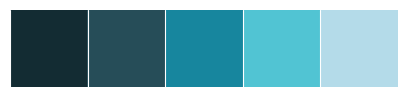

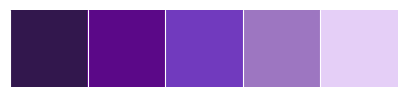

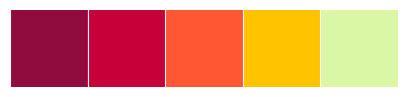

In [ ]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_red = ["#900C3F", "#C70039", '#FF5733', '#FFC300', '#DAF7A6']
colors_dark= ["#32174d","#5B0888",'#713ABE','#9D76C1','#E5CFF7']
sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AspireNex/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# **VISUALISATION**

In [ ]:
d= pd.DataFrame(df['Survived'].value_counts())
fig = px.pie(d,values='count',names=['Not Survived','Survived'],hole=0.4,opacity=0.6,
            color_discrete_sequence=[colors_red[3],colors_blue[3]],
             labels={'label':'Survived','Survived':'No. Of Samples'})

fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=15,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Survived',
                   x=0.5,y=0.5,showarrow=False,font_size=17,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many people survived?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show(rendered='colab')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.size,df.shape

(5016, (418, 12))

<Axes: xlabel='Survived', ylabel='count'>

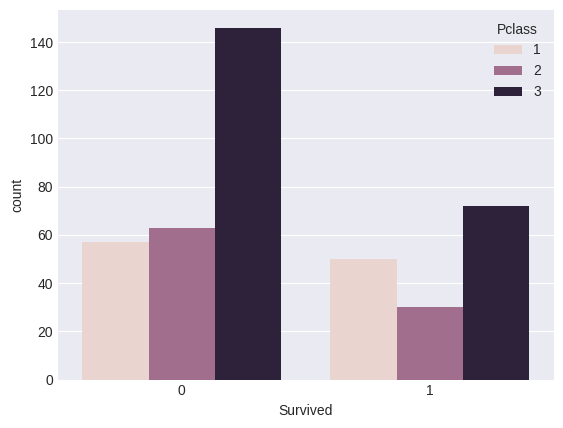

In [ ]:
sns.countplot(x = 'Survived',hue = 'Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

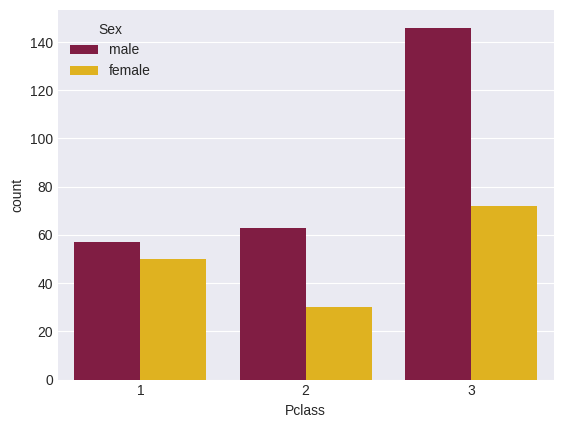

In [ ]:
sns.countplot(x='Pclass',hue='Sex',data=df,palette=["#900C3F",'#FFC300'])

In [ ]:
df.drop(['Name','Cabin'],axis=1,inplace=True)

In [ ]:
path = '/content/drive/MyDrive/AspireNex/output.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f,index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AspireNex/output.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S
2,894,0,2,male,62.0,0,0,240276,9.6875,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,S


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# Convert 'Ticket' column to numeric, handling non-numeric values
df['Ticket'] = pd.to_numeric(df['Ticket'], errors='coerce')

# Fill missing values (NaN) introduced by conversion with 0
df['Ticket'] = df['Ticket'].fillna(0)

df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Embarked'])
df.drop("Embarked", axis=1, inplace=True)
df["Embarked"] = label

[]

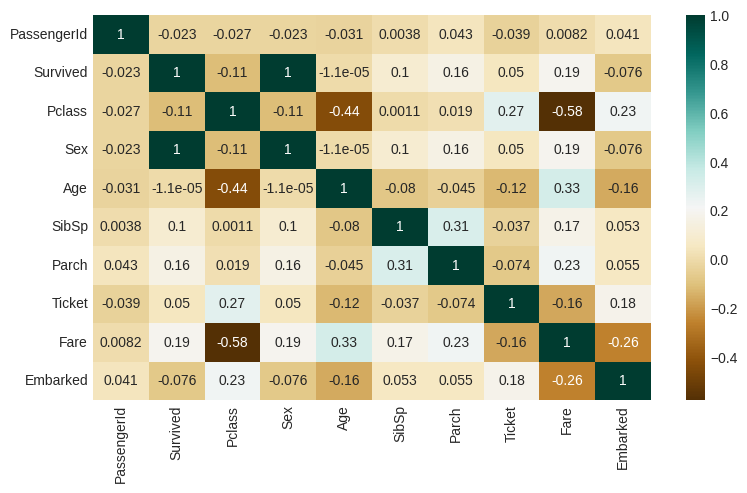

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'BrBG')
plt.plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    float64
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 32.8 KB


In [126]:
x=df.drop(['Survived','PassengerId'],axis=1)
y=df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y ,random_state=5,
                                   test_size=0.33,
                                   shuffle=True)

# **LINEAR REGRESSION**

In [127]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Coefficients: ', model.coef_)

Coefficients:  [ 4.13913629e-11  1.00000000e+00 -3.66223572e-14  1.34975908e-12
 -3.87252528e-12  0.00000000e+00 -3.94649591e-17  5.81028603e-17]


In [128]:
accuracy=r2_score(y_test,y_pred)*100
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(">>>>>>>>>> LINEAR REGRESSION MODEL PERFORMANCE <<<<<<<<<<<\n")
print("Accuracy of the model is: %.6f" %accuracy)
print('scipy MSE: {:.6f}'.format(mse))
print('scipy RMSE: {:.6f}'.format(rmse))

>>>>>>>>>> LINEAR REGRESSION MODEL PERFORMANCE <<<<<<<<<<<

Accuracy of the model is: 100.000000
scipy MSE: 0.000000
scipy RMSE: 0.000000


# **DECISION TREE**

In [129]:
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
# Training Model
model_dt.fit(x_train,y_train)

# Making Prediction
pred_dt = model_dt.predict(x_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

1.0


# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
pred_knn = knn.predict(x_test)
print("Accuracy of Titanic Dataset using Knn = ",accuracy_score(y_test,pred_knn))

Accuracy of Titanic Dataset using Knn =  0.5579710144927537


# **RANDOM FOREST REGRESSION**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)
y_pred1=regressor.predict(x_test)
accuracy=r2_score(y_test,y_pred1)*100
mse = mean_squared_error(y_test, y_pred1, squared=True)
rmse = mean_squared_error(y_test, y_pred1, squared=False)
print(">>>>>>>>>> RANDOM FOREST REGRESSION MODEL PERFORMANCE <<<<<<<<<<<\n")
print("Accuracy of the model is: %.6f" %accuracy)
print('scipy MSE: {:.6f}'.format(mse))
print('scipy RMSE: {:.6f}'.format(rmse))

>>>>>>>>>> RANDOM FOREST REGRESSION MODEL PERFORMANCE <<<<<<<<<<<

Accuracy of the model is: 100.000000
scipy MSE: 0.000000
scipy RMSE: 0.000000
